In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [14]:
img = cv2.imread('coin.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [15]:
cv2.imshow('image',thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

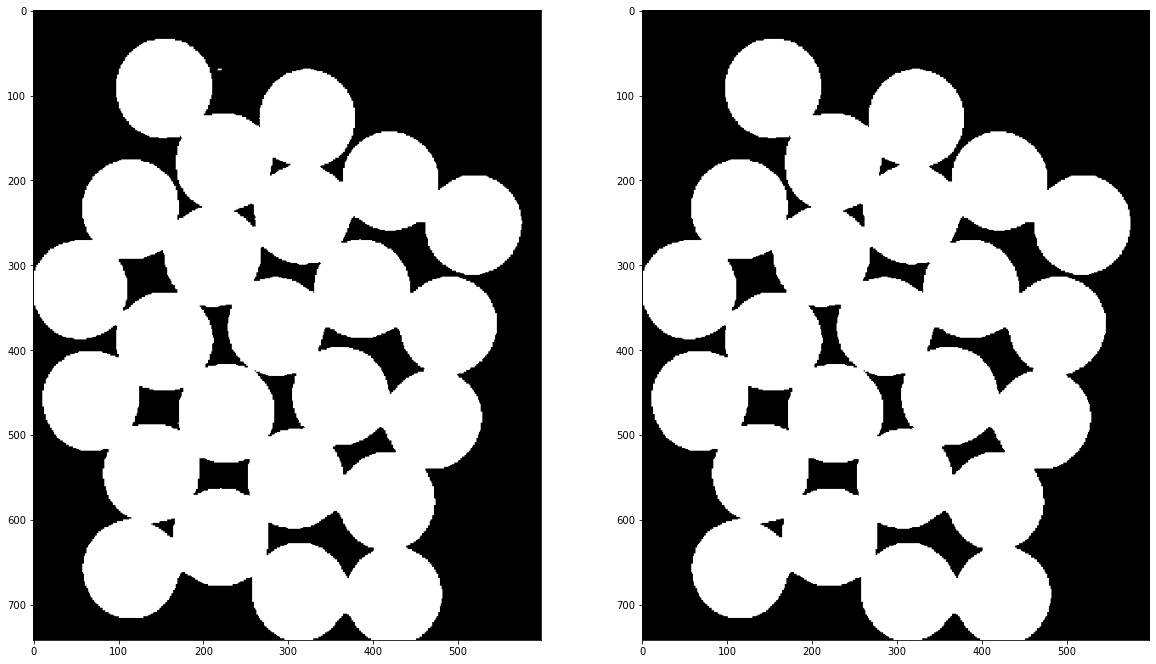

In [23]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(thresh, 'gray')
plt.subplot(122), plt.imshow(opening, 'gray')
plt.show()

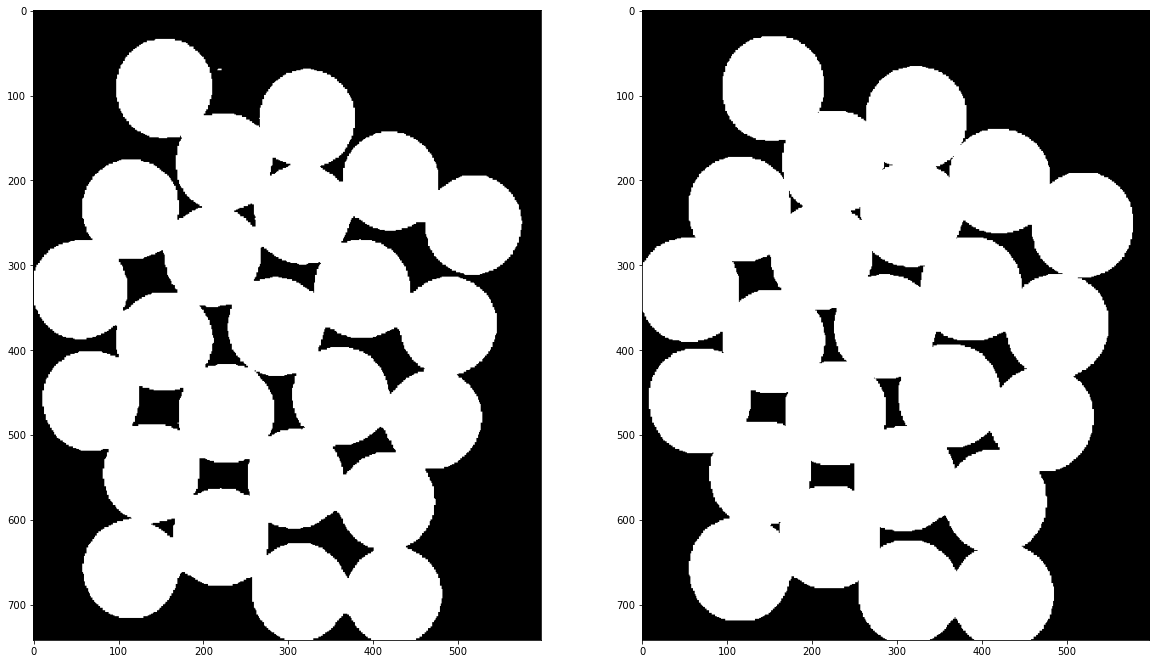

In [29]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(thresh, 'gray')
plt.subplot(122), plt.imshow(sure_bg, 'gray')
plt.show()

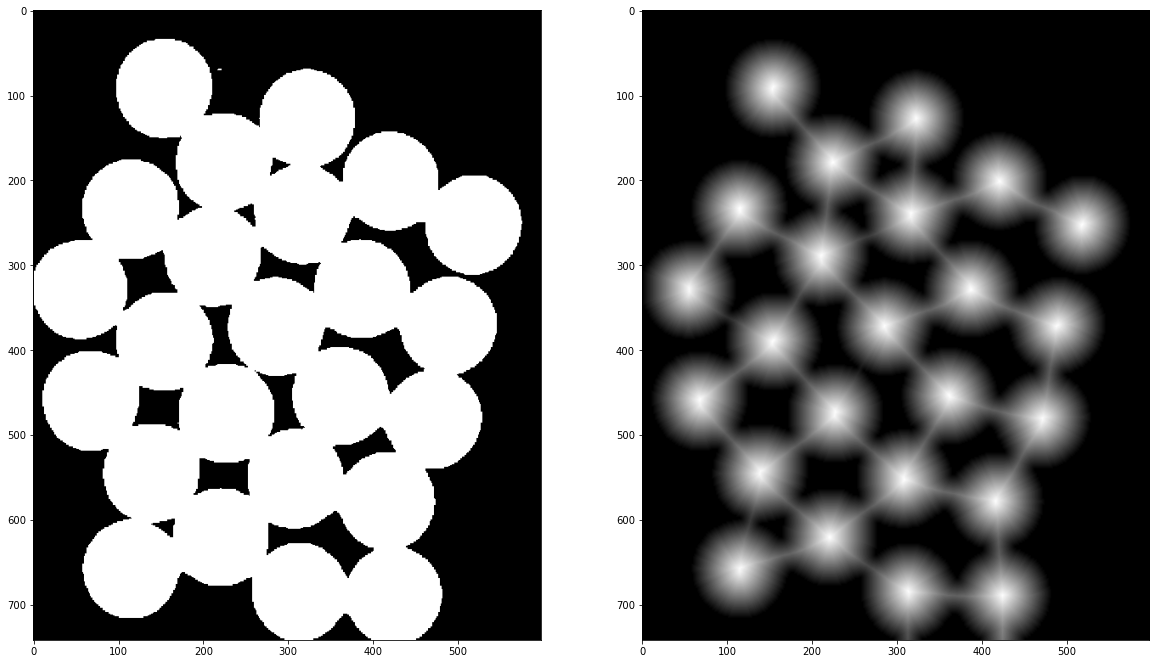

In [30]:
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(thresh, 'gray')
plt.subplot(122), plt.imshow(dist_transform, 'gray')
plt.show()

In [35]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

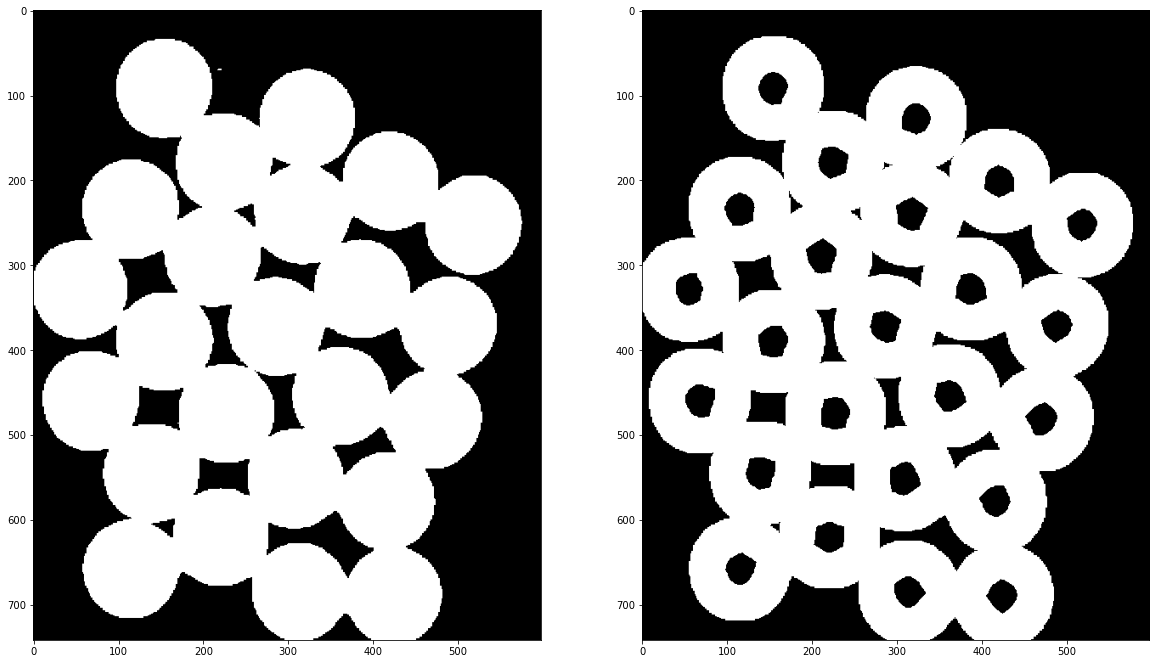

In [36]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(thresh, 'gray')
plt.subplot(122), plt.imshow(unknown, 'gray')
plt.show()

In [37]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

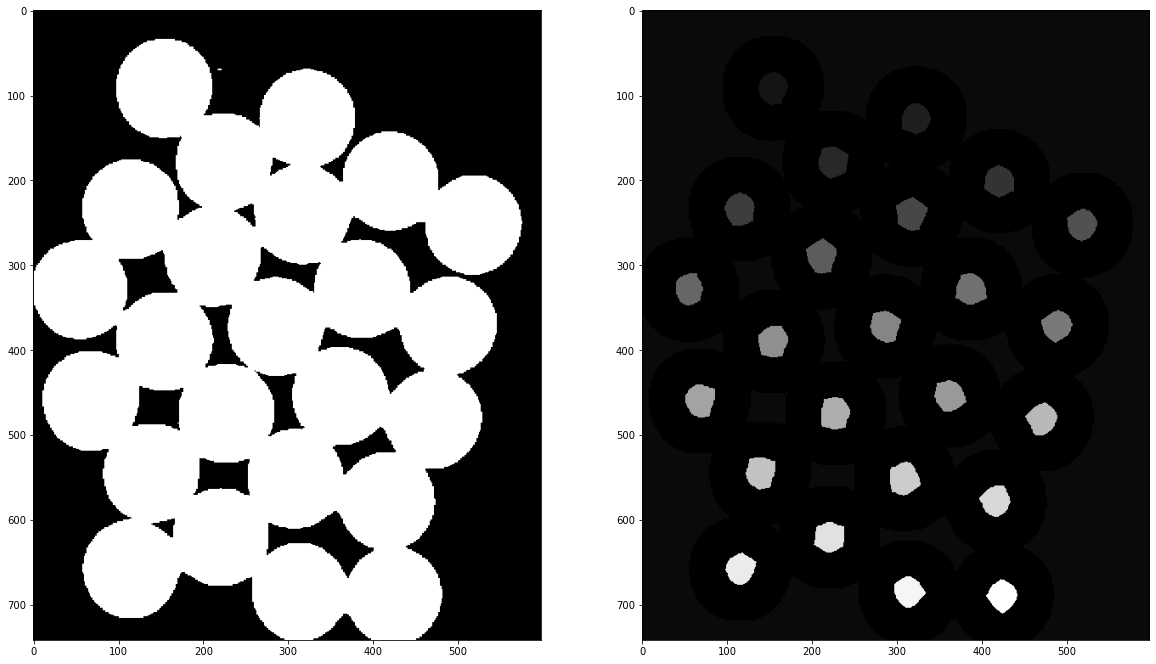

In [38]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(thresh, 'gray')
plt.subplot(122), plt.imshow(markers, 'gray')
plt.show()

In [39]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]


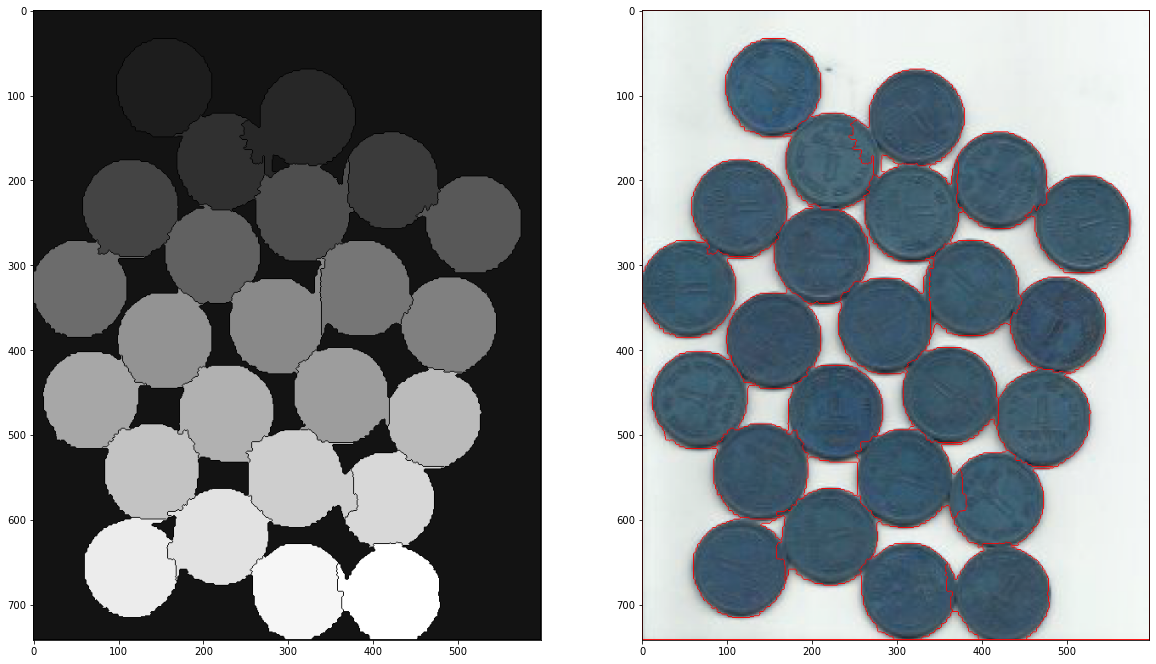

In [50]:
plt.figure(figsize=(20,15))
plt.subplot(121), plt.imshow(markers, 'gray')
plt.subplot(122), plt.imshow(img, 'gray')
plt.show()